<a href="https://colab.research.google.com/github/atc00009/DeepLearning-AthiraChitrapal/blob/main/Task_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [28]:
# Importing dataset library  to use CIFAR data
import keras                              
from keras.datasets import cifar10        

In [29]:
# Importing other necessary libraries
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import seaborn as sns                    # to plot images and statical version of data
import numpy as np
import matplotlib.pyplot as plt
import random

from keras import layers

In [3]:
tf.__version__

'2.8.0'

In [4]:
keras.__version__

'2.8.0'

In [5]:
#Dataset of 50,000 32x32 color training images and 10,000 test images, labeled over 10 categories
#The data, split between train and test sets:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('x_train shape:', x_train.shape)
print('y_train shape: ', y_train.shape)

print('\nx_test shape:', x_test.shape)
print('y_test shape: ', y_test.shape )

print('\nTotal train samples', x_train.shape[0])
print('Total test samples', x_test.shape[0])

170508288/170498071 [==============================] - 4s 0us/step
x_train shape: (50000, 32, 32, 3)
y_train shape:  (50000, 1)

x_test shape: (10000, 32, 32, 3)
y_test shape:  (10000, 1)

Total train samples 50000
Total test samples 10000


In [6]:
target = []
indexes=[]
while (len(target) != 10):
  j = random.randint(0, 49999)
  val = y_train[j][0]

  if val not in target:
    target.append(val)
    indexes.append(j)

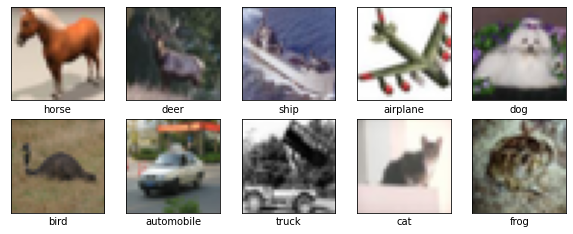

In [7]:
# Display 10 random images from each class

# creating list of target values
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))
for  x in range(10):
    plt.subplot(5,5, x +1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[indexes[x]])                  # print the image
    plt.xlabel(class_names[y_train[indexes[x]][0]])  # The CIFAR labels happen to be arrays, which needs the extra index

plt.show()

In [8]:
# Normalize the data. Need to convert data type to float for computation.
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
num_classes=10
# Convert class vectors to binary class matrices, this is called one hot encoding.
y_train_ = tf.keras.utils.to_categorical(y_train, num_classes)
y_test_  = tf.keras.utils.to_categorical(y_test, num_classes)

In [9]:
from keras import datasets, layers, models
LeNet = models.Sequential()

LeNet.add(layers.Conv2D(6, (5,5), activation = 'tanh', strides  =1, input_shape= (32,32,3)))
LeNet.add(layers.AveragePooling2D())

LeNet.add(layers.Conv2D(16, (5,5), activation = 'tanh', strides= 1))
LeNet.add(layers.AveragePooling2D())

LeNet.add(layers.Flatten())

LeNet.add(layers.Dense(120, activation='tanh'))

LeNet.add(layers.Dense(84, activation='tanh'))

LeNet.add(layers.Dense(10, activation='softmax'))
LeNet.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 6)         456       
                                                                 
 average_pooling2d (AverageP  (None, 14, 14, 6)        0         
 ooling2D)                                                       
                                                                 
 conv2d_1 (Conv2D)           (None, 10, 10, 16)        2416      
                                                                 
 average_pooling2d_1 (Averag  (None, 5, 5, 16)         0         
 ePooling2D)                                                     
                                                                 
 flatten (Flatten)           (None, 400)               0         
                                                                 
 dense (Dense)               (None, 120)               4

In [10]:
LeNet.compile(optimizer = 'Adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [11]:
# Training the model with 35 Epochs with coresponding train loss and accuracy
history_35 = LeNet.fit(x_train, y_train, epochs=35, verbose=1)

Epoch 1/35
1563/1563 [==============================] - 44s 28ms/step - loss: 1.7949 - accuracy: 0.3638
Epoch 2/35
1563/1563 [==============================] - 43s 27ms/step - loss: 1.5470 - accuracy: 0.4497
Epoch 3/35
1563/1563 [==============================] - 46s 29ms/step - loss: 1.4224 - accuracy: 0.4959
Epoch 4/35
1563/1563 [==============================] - 47s 30ms/step - loss: 1.3451 - accuracy: 0.5223
Epoch 5/35
1563/1563 [==============================] - 45s 29ms/step - loss: 1.2825 - accuracy: 0.5451
Epoch 6/35
1563/1563 [==============================] - 43s 28ms/step - loss: 1.2328 - accuracy: 0.5625
Epoch 7/35
1563/1563 [==============================] - 46s 30ms/step - loss: 1.1892 - accuracy: 0.5797
Epoch 8/35
1563/1563 [==============================] - 44s 28ms/step - loss: 1.1484 - accuracy: 0.5945
Epoch 9/35
1563/1563 [==============================] - 43s 28ms/step - loss: 1.1096 - accuracy: 0.6078
Epoch 10/35
1563/1563 [==============================] - 44s 28m

In [12]:
history_35.history.keys()

dict_keys(['loss', 'accuracy'])

In [13]:
accuracy_35 = history_35.history['accuracy']
loss_35 = history_35.history['loss']
epochs_35 = range(len(accuracy_35))

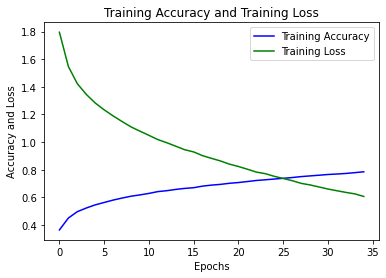

In [14]:
## Ploting Accuracy and loss after 35 epochs 
plt.plot(epochs_35, accuracy_35, 'b', label = 'Training Accuracy')
plt.plot(epochs_35, loss_35, 'g', label = 'Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Accuracy and Loss')
plt.title('Training Accuracy and Training Loss')
plt.legend()
plt.show()

In [15]:
# Evaluating model on train data
tr_score = LeNet.evaluate(x_train, y_train, verbose =0)
# Evaluating model on test data
score = LeNet.evaluate(x_test, y_test,verbose= 0)
# Model Training and Testing accuracy

print('Train accuracy: %.3f, Test accuracy: %.3f' % (tr_score[1], score[1]))

Train accuracy: 0.808, Test accuracy: 0.517


'truck'

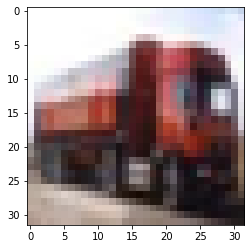

In [61]:
# Random image to test
test_i = random.randint(1, 10000)
plt.imshow(x_test[test_i]) # showing the image
class_names[y_test[test_i][0]] # showing the label of that images

In [62]:
import cv2
IMAGE_CHANNEL = 3

def prepare(filepath):
    IMG_SIZE = 32
    new_array = cv2.resize(x_test[test_i], (IMG_SIZE, IMG_SIZE))
    return new_array.reshape(-1, IMG_SIZE, IMG_SIZE, IMAGE_CHANNEL)

#Predicting the data on the model
predicted_class = LeNet.predict([prepare(x_test[test_i])])
class_names[np.argmax(predicted_class)]

'truck'

In [63]:
from keras import datasets, layers, models
LeNet_im = models.Sequential()

LeNet_im.add(layers.Conv2D(6, (7,7), activation = 'relu',padding = 'same', input_shape= (32,32,3)))   #padding set to same , filter size 7X7
LeNet_im.add(layers.MaxPooling2D())  # MaX pooling 

LeNet_im.add(layers.Conv2D(16, (7,7),padding = 'same',activation = 'relu'))  #padding set to same , filter size 7X7
LeNet_im.add(layers.BatchNormalization())  # batch normalization layer
LeNet_im.add(layers.MaxPooling2D())  # Maxpooling


# Added Convolutional and Maxpooling layer
LeNet_im.add(layers.Conv2D(32, (7,7),padding = 'same',activation = 'relu'))  #padding set to same , filter size 7X7
LeNet_im.add(layers.MaxPooling2D())  # Maxpooling

LeNet_im.add(layers.Flatten())

LeNet_im.add(layers.Dense(120, activation='relu'))

LeNet_im.add(layers.Dense(84, activation='relu'))
#added  a dense layer
LeNet_im.add(layers.Dense(43, activation='relu')) 
                          
LeNet_im.add(layers.Dense(10, activation='softmax'))
LeNet_im.summary()


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 32, 32, 6)         888       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 16, 16, 6)        0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 16, 16, 16)        4720      
                                                                 
 batch_normalization_2 (Batc  (None, 16, 16, 16)       64        
 hNormalization)                                                 
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 8, 8, 16)         0         
 2D)                                                             
                                                      

In [64]:
# optimizer as Stochastic Gradient Descent having learning rate and momentum set to 0.0001 and 0.9 respectively
opt = tf.keras.optimizers.SGD(learning_rate=0.0001,momentum= 0.9)      
LeNet_im.compile(optimizer = 'SGD', loss='sparse_categorical_crossentropy', metrics=['accuracy'])          # optimzer is Stochastic gradient descent 

In [20]:
# Training the improved model
history_50 = LeNet_im.fit(x_train, y_train, epochs=50, batch_size=256, verbose=1)  #epochs as 50, batch_size=256 

Epoch 1/50
196/196 [==============================] - 110s 557ms/step - loss: 2.0473 - accuracy: 0.2548
Epoch 2/50
196/196 [==============================] - 110s 563ms/step - loss: 1.7078 - accuracy: 0.3849
Epoch 3/50
196/196 [==============================] - 109s 557ms/step - loss: 1.5554 - accuracy: 0.4408
Epoch 4/50
196/196 [==============================] - 109s 556ms/step - loss: 1.4733 - accuracy: 0.4691
Epoch 5/50
196/196 [==============================] - 105s 538ms/step - loss: 1.4116 - accuracy: 0.4908
Epoch 6/50
196/196 [==============================] - 105s 534ms/step - loss: 1.3645 - accuracy: 0.5124
Epoch 7/50
196/196 [==============================] - 105s 534ms/step - loss: 1.3253 - accuracy: 0.5286
Epoch 8/50
196/196 [==============================] - 108s 549ms/step - loss: 1.2830 - accuracy: 0.5423
Epoch 9/50
196/196 [==============================] - 109s 558ms/step - loss: 1.2501 - accuracy: 0.5568
Epoch 10/50
196/196 [==============================] - 109s 558m

In [65]:
accuracy_50 = history_50.history['accuracy']
loss_50 = history_50.history['loss']
epochs_50 = range(len(accuracy_50))

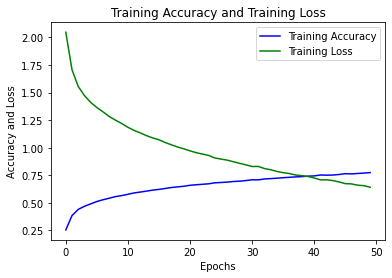

In [66]:
## Ploting Accuracy and loss after 35 epochs 
plt.plot(epochs_50, accuracy_50, 'b', label = 'Training Accuracy')
plt.plot(epochs_50, loss_50, 'g', label = 'Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Accuracy and Loss')
plt.title('Training Accuracy and Training Loss')
plt.legend()
plt.show()

In [67]:
# Evaluating model on train data
tr_score1 = LeNet_im.evaluate(x_train, y_train, verbose =0)
# Evaluating model on test data
score1 = LeNet_im.evaluate(x_test, y_test,verbose= 0)
# Model Training and Testing accuracy

print('Train accuracy: %.3f, Test accuracy: %.3f' % (tr_score1[1], score1[1]))

Train accuracy: 0.100, Test accuracy: 0.099


In [68]:
import cv2
IMAGE_CHANNEL = 3

def prepare(filepath):
    IMG_SIZE = 32
    new_array = cv2.resize(x_test[test_i], (IMG_SIZE, IMG_SIZE))
    return new_array.reshape(-1, IMG_SIZE, IMG_SIZE, IMAGE_CHANNEL)

#Predicting the data on the model
predicted_class = LeNet_im.predict([prepare(x_test[test_i])])
class_names[np.argmax(predicted_class)]

'truck'